Plot histograms of MIC values for each antibiotic

In [9]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
import dotenv

from sklearn.externals import joblib

# add the 'src' directory as one where we can import modules
project_dir = os.path.join(os.getcwd(), os.pardir)
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.tools

# load env
%load_ext dotenv
dotenv_path = os.path.join(project_dir, '.env')
dotenv.load_dotenv(dotenv_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


True

In [10]:
# Load data
micsdf = joblib.load(os.path.join(os.environ.get('PRDATA'), 'interim', 'mic_class_dataframe.pkl'))
class_orders = joblib.load(os.path.join(os.environ.get('PRDATA'), 'interim', 'mic_class_order_dict.pkl'))


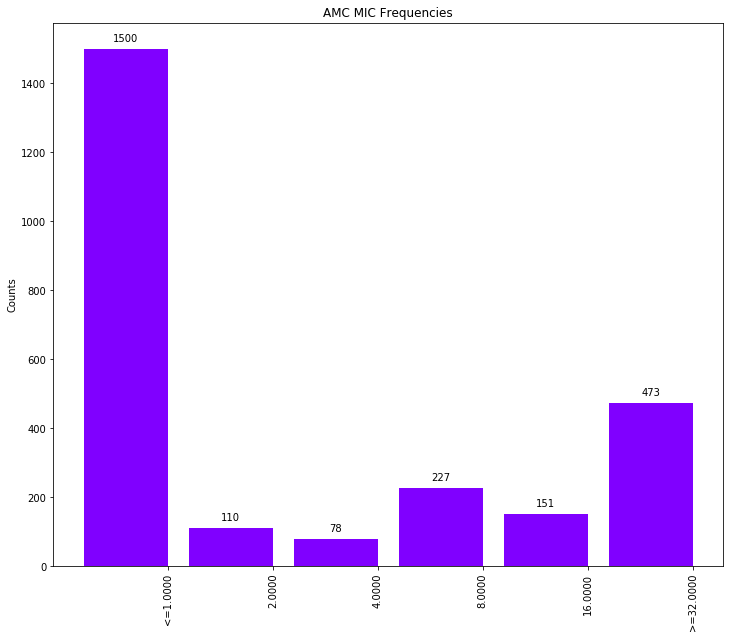

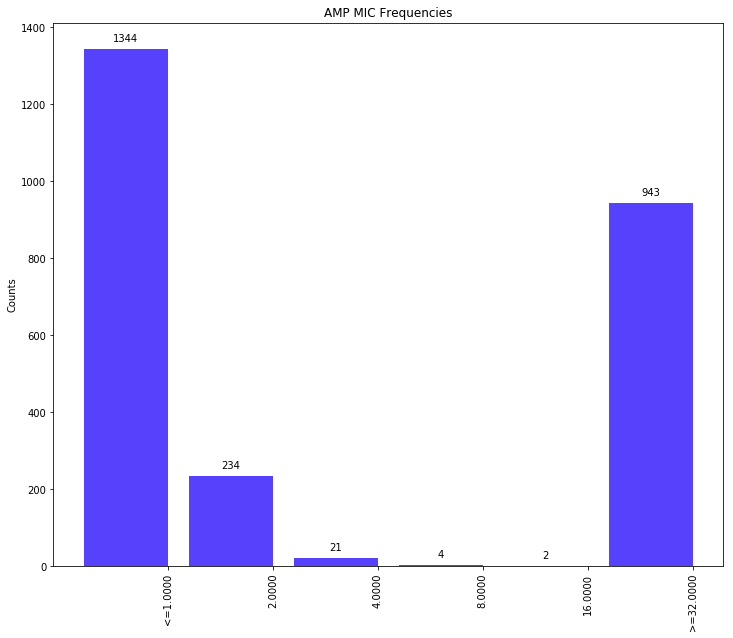

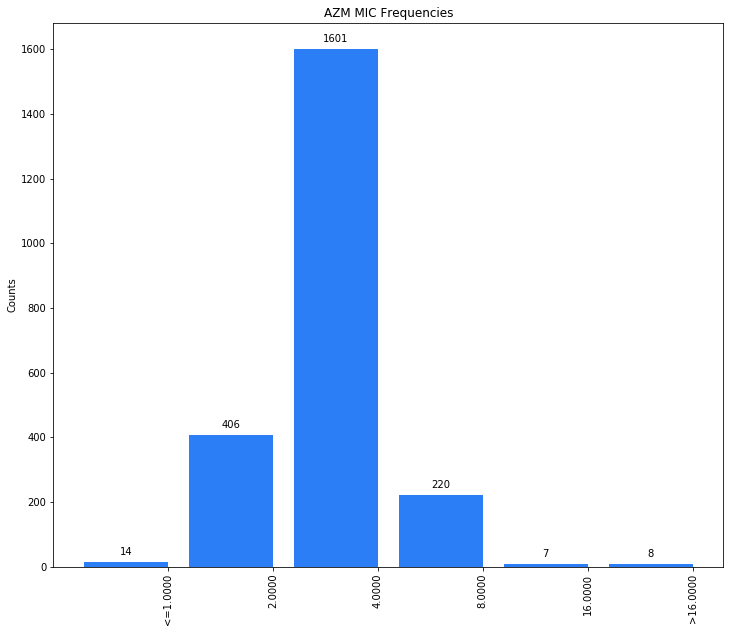

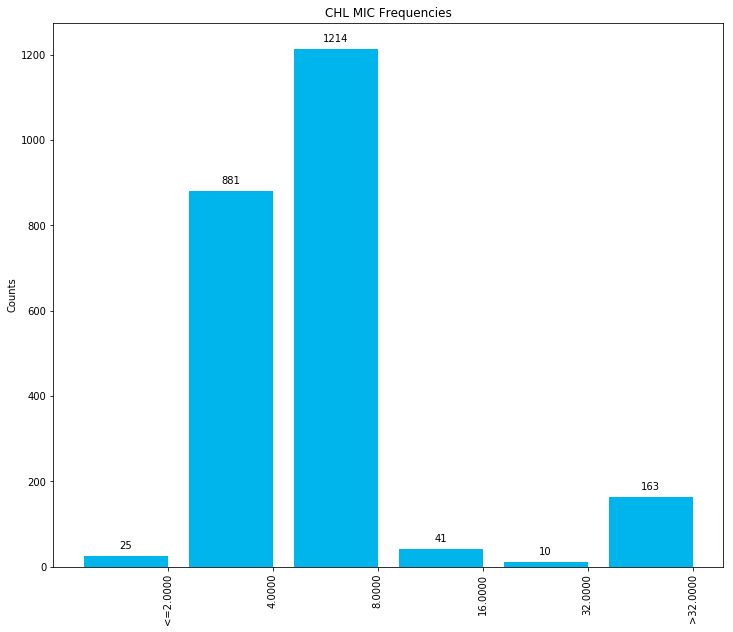

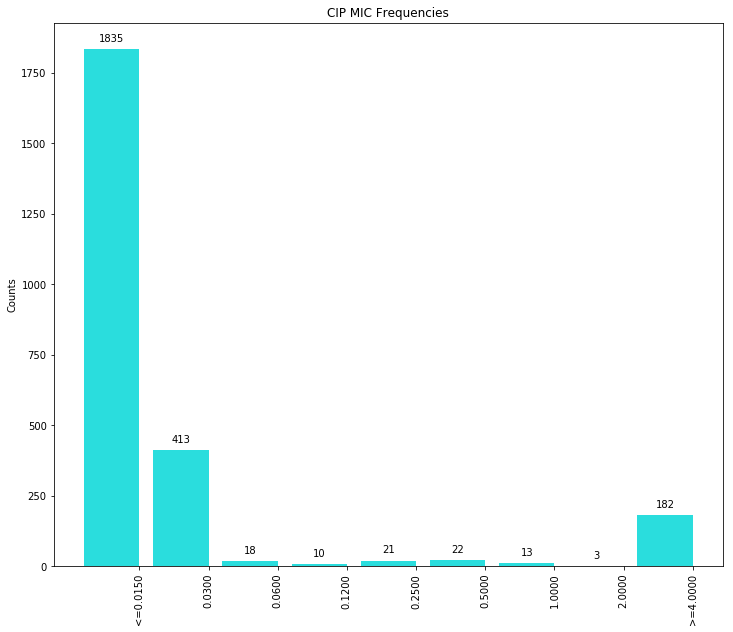

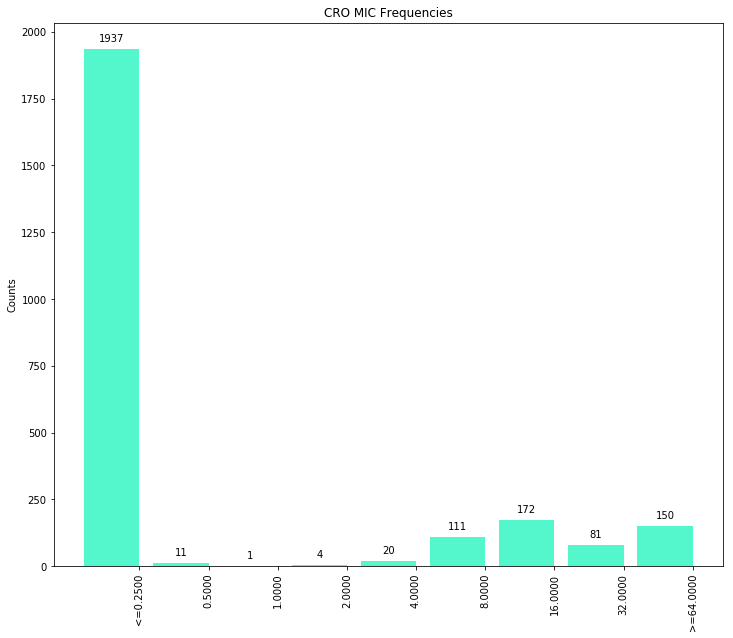

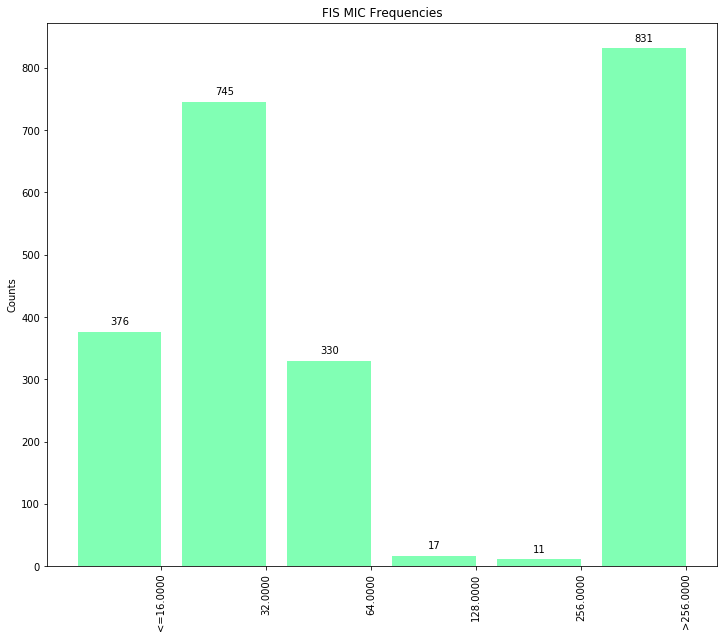

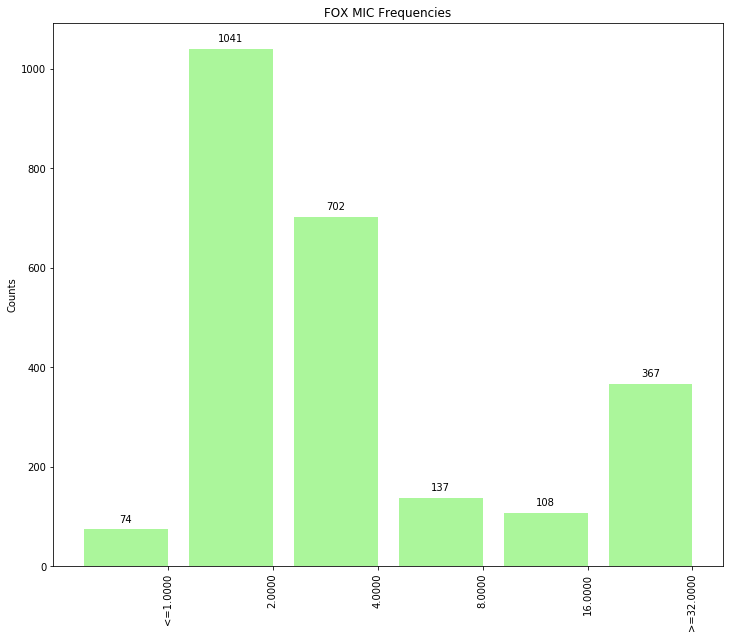

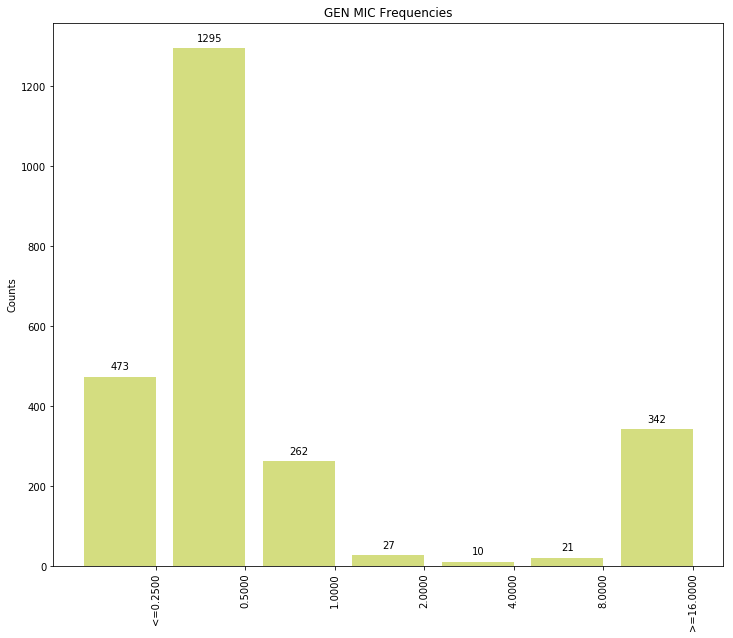

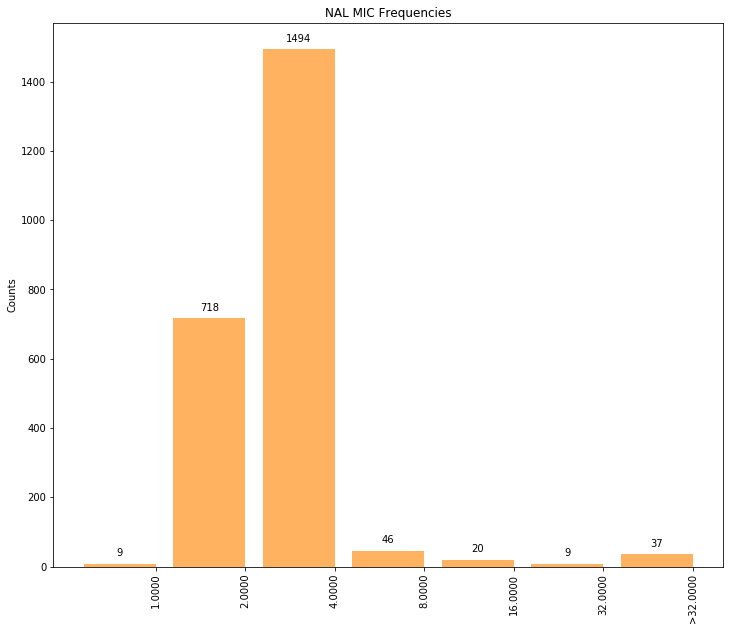

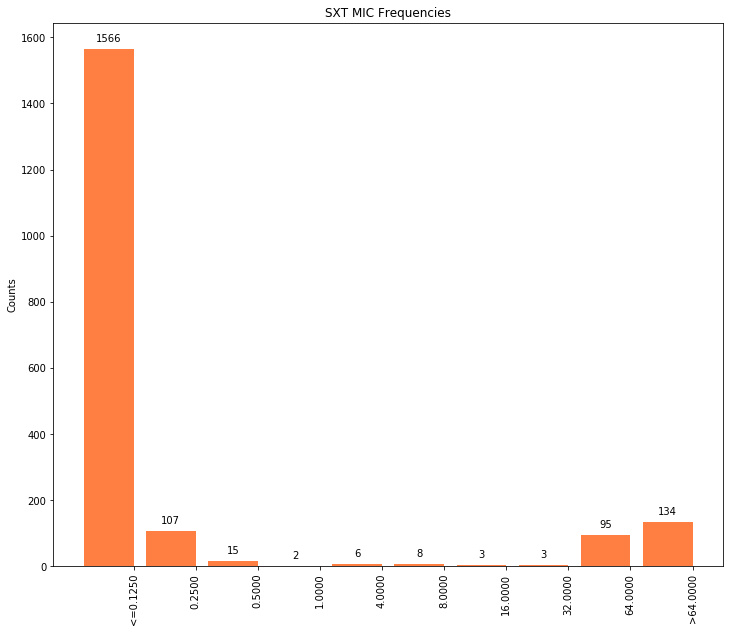

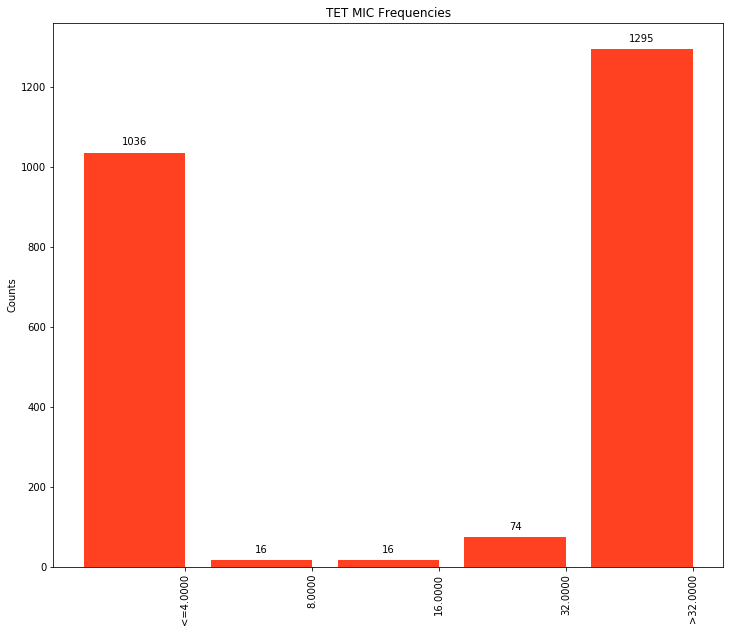

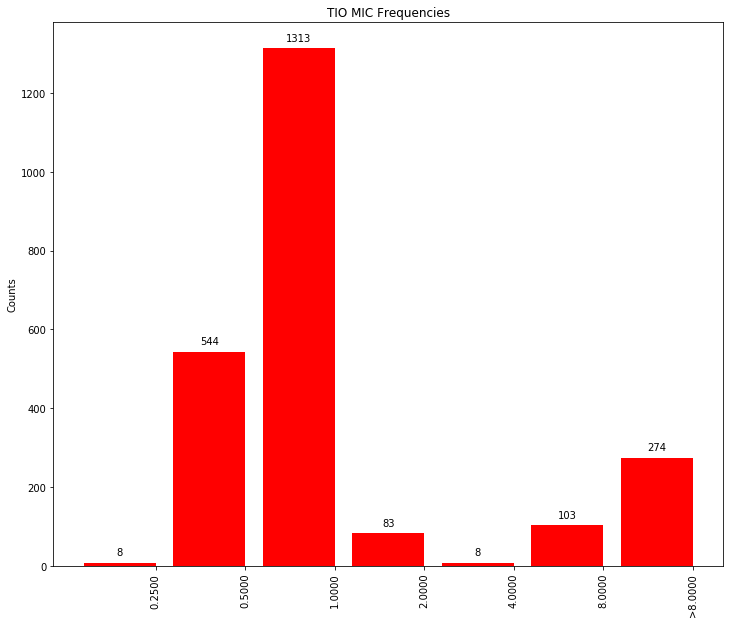

In [36]:
# MIC distributions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,10]


colors=iter(cm.rainbow(np.linspace(0,1,micsdf.shape[1])))

for col in micsdf:
    counts = micsdf[col].value_counts()[class_orders[col]]
    mics = counts.index.values
    N = len(mics)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.8       # the width of the bars

    c=next(colors)
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color=c)

    ax.set_ylabel('Counts')
    ax.set_title(col+' MIC Frequencies')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(mics)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)


    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        _, ymax = plt.ylim()
        bump = ymax * 0.01
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

    plt.show()

In [23]:
print(counts.index.values)

['<=1.0000' '2.0000' '4.0000' '8.0000' '16.0000' '>=32.0000']


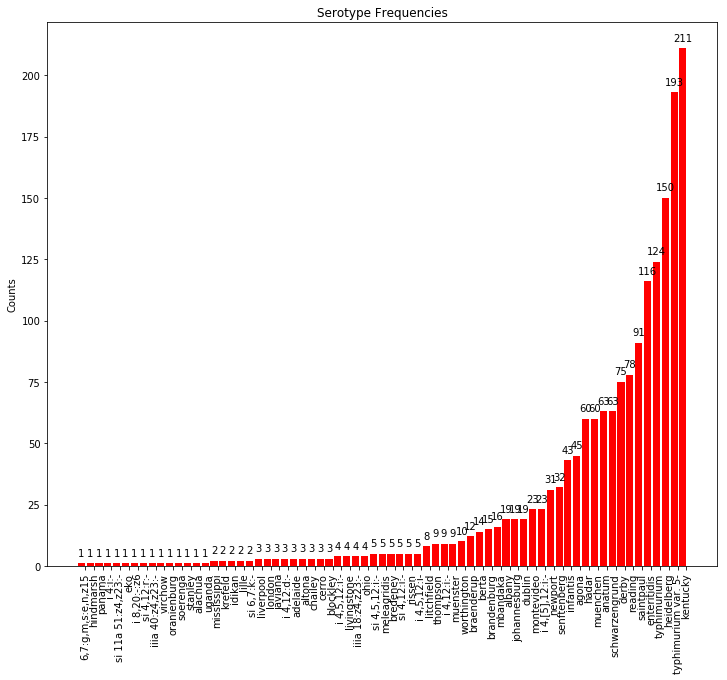

In [82]:


# Serotype distribution
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,10]

serotypes, counts = np.unique(meta['SEROTYPE'], return_counts=True)
sortedord = np.argsort(counts)
serotypes = serotypes[sortedord]
counts = counts[sortedord]
N = len(serotypes)

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='r')

ax.set_ylabel('Counts')
ax.set_title('Serotype Frequencies')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(serotypes)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    _, ymax = plt.ylim()
    bump = ymax * 0.01
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

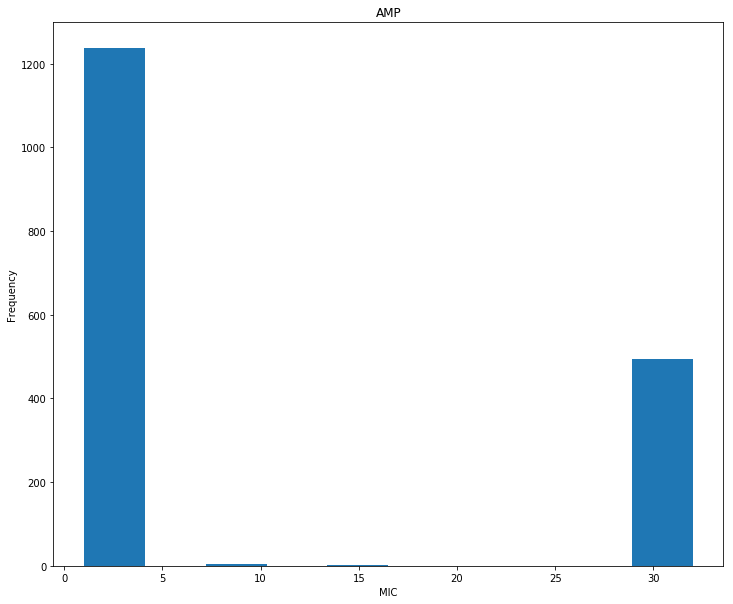

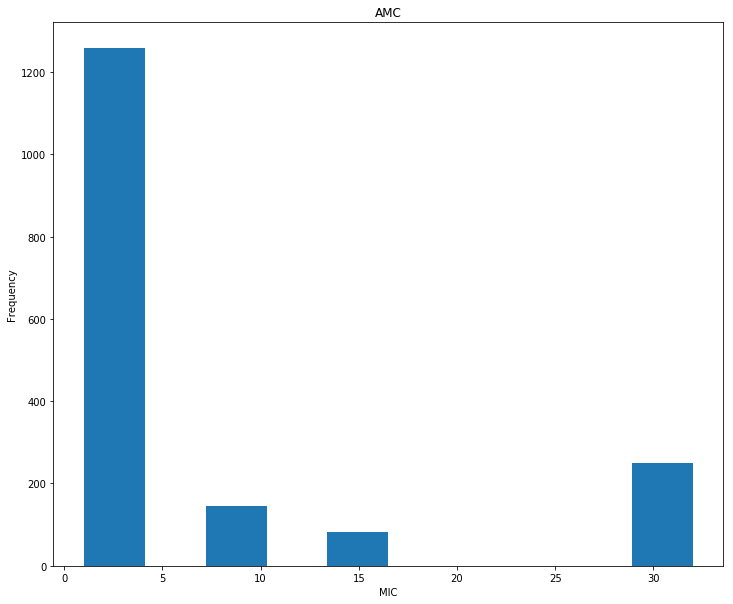

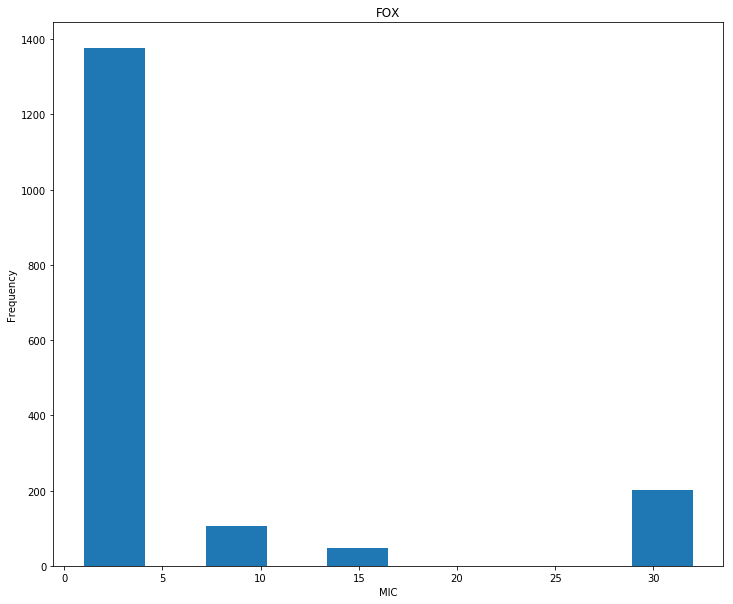

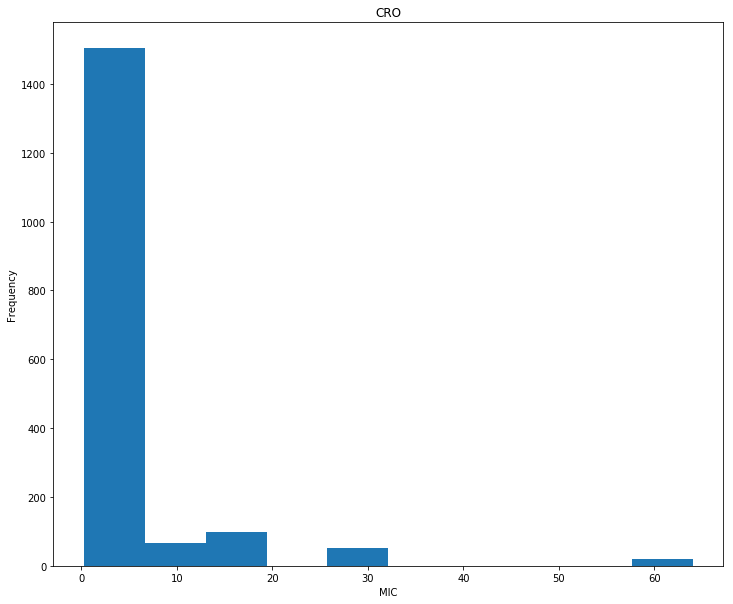

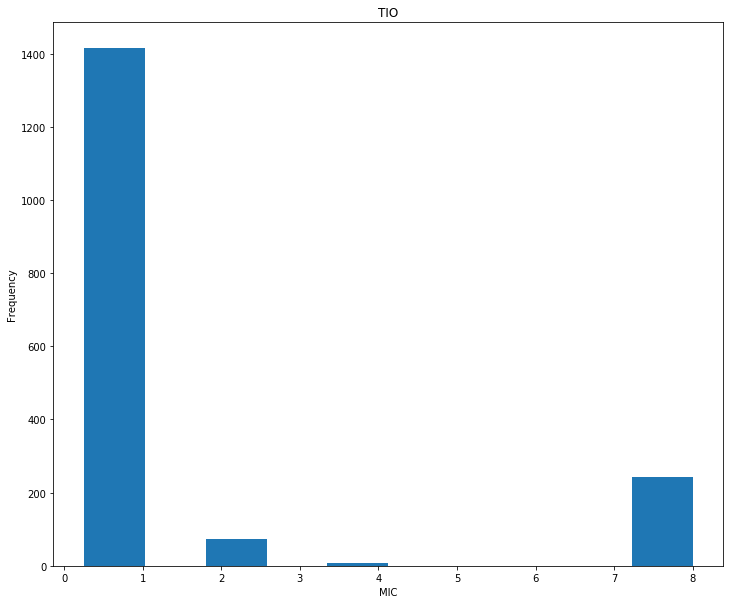

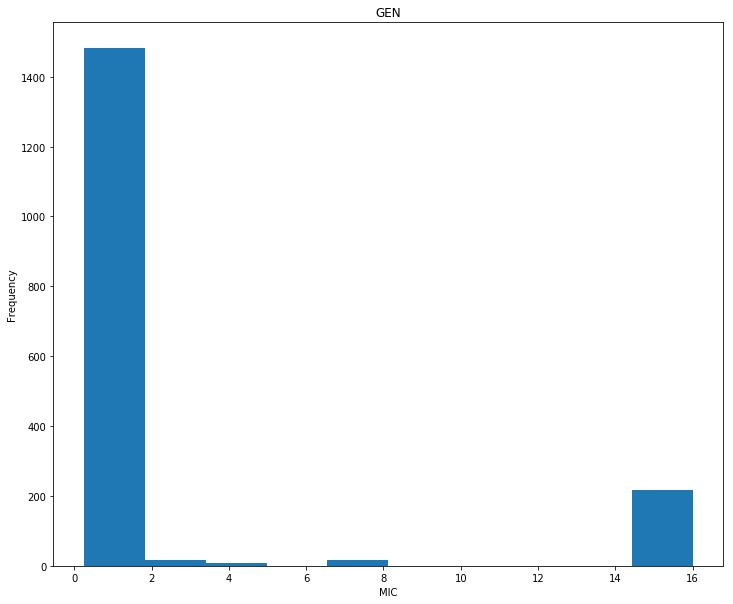

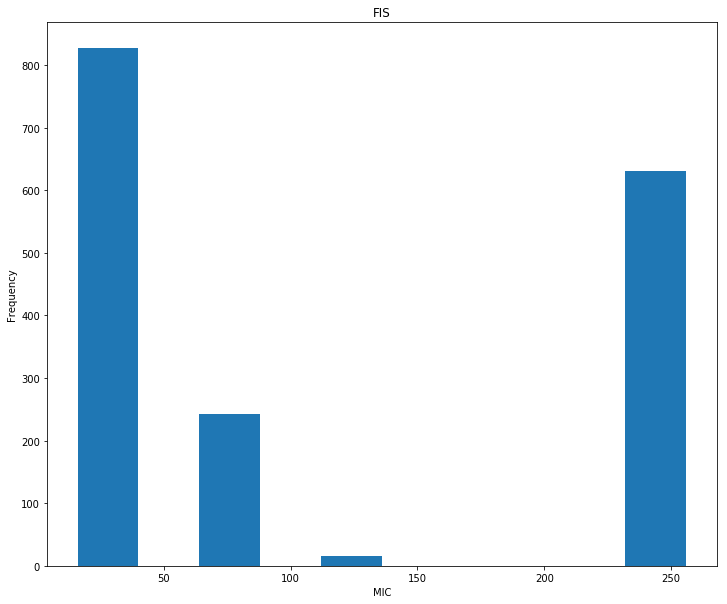

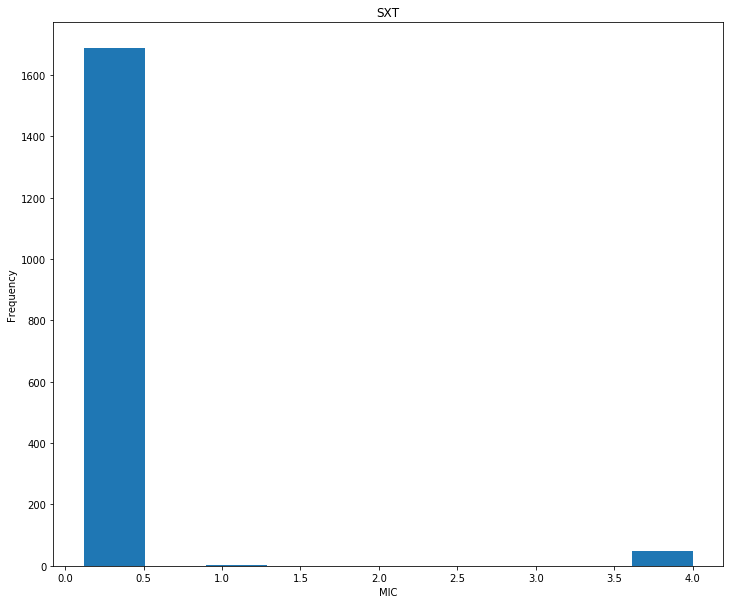

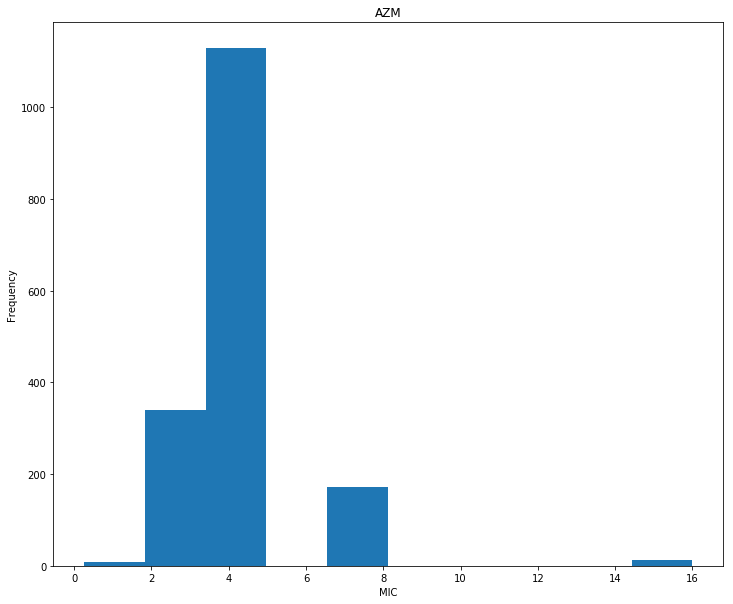

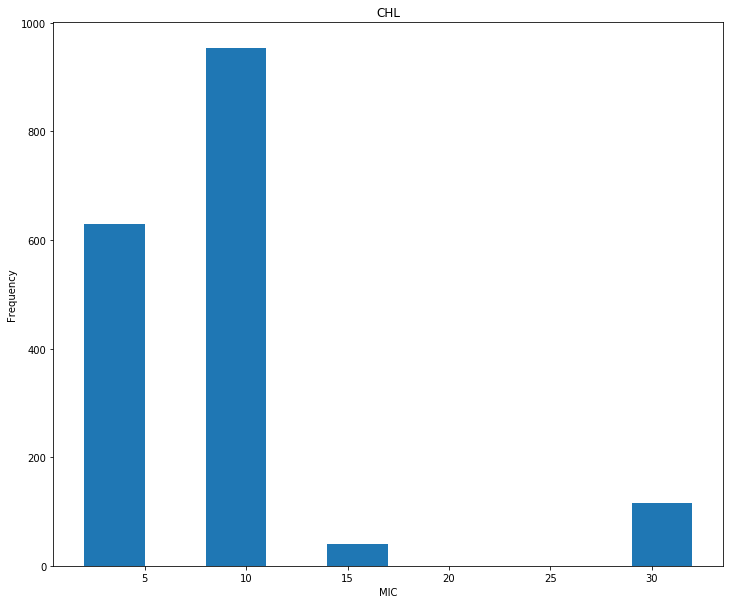

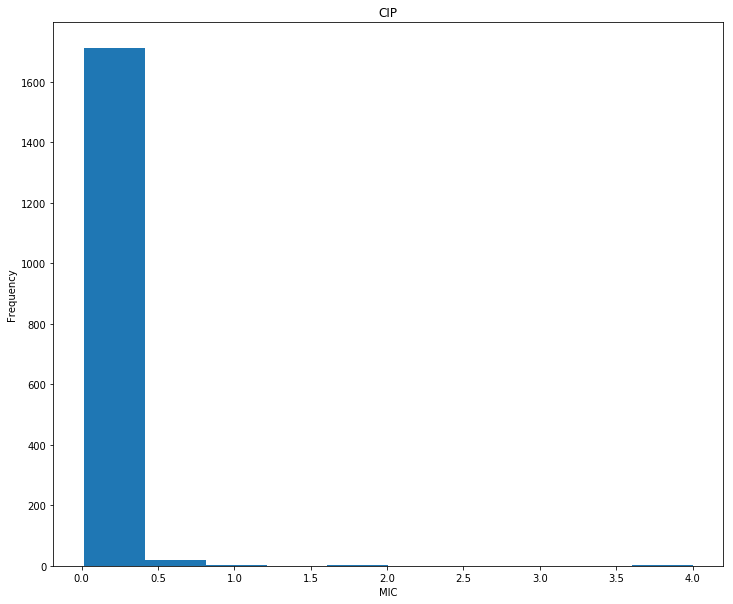

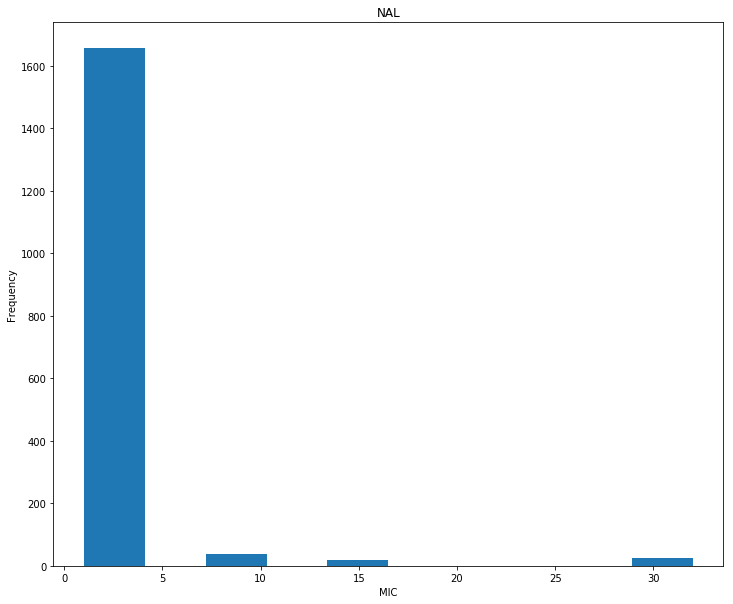

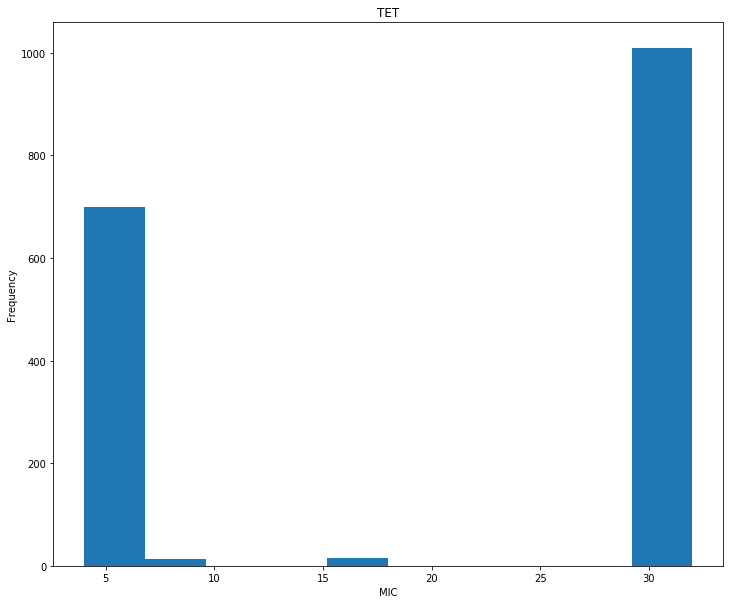

In [104]:
# MIC distributions
for drug in list(mic):
    tmp = mic[drug][~np.isnan(mic[drug])]
    plt.hist(tmp)
    plt.title(drug)
    plt.xlabel("MIC")
    plt.ylabel("Frequency")
    plt.show()

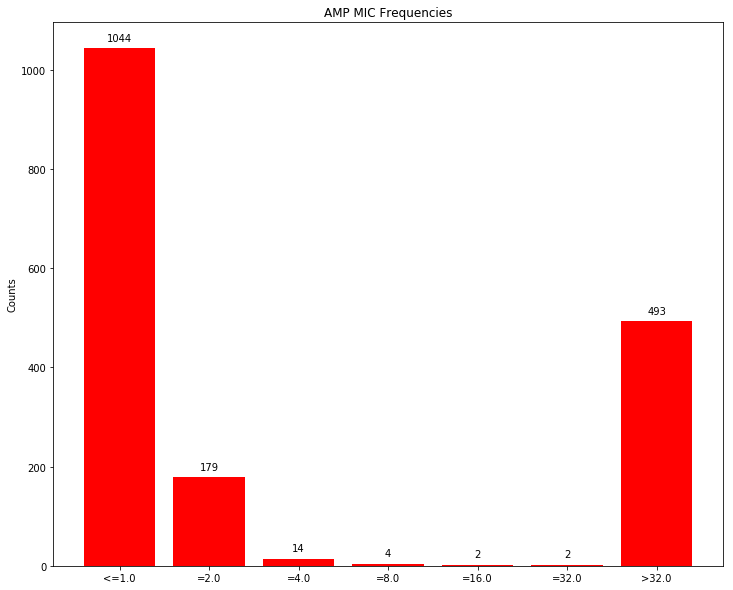

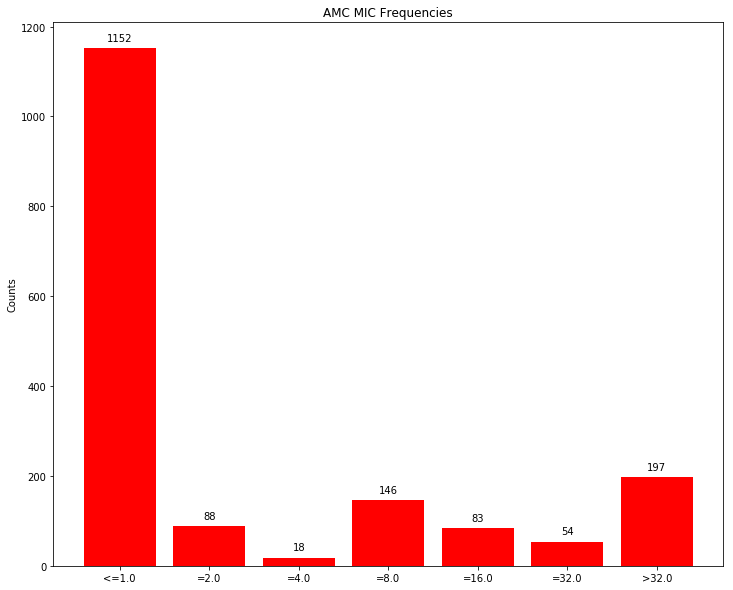

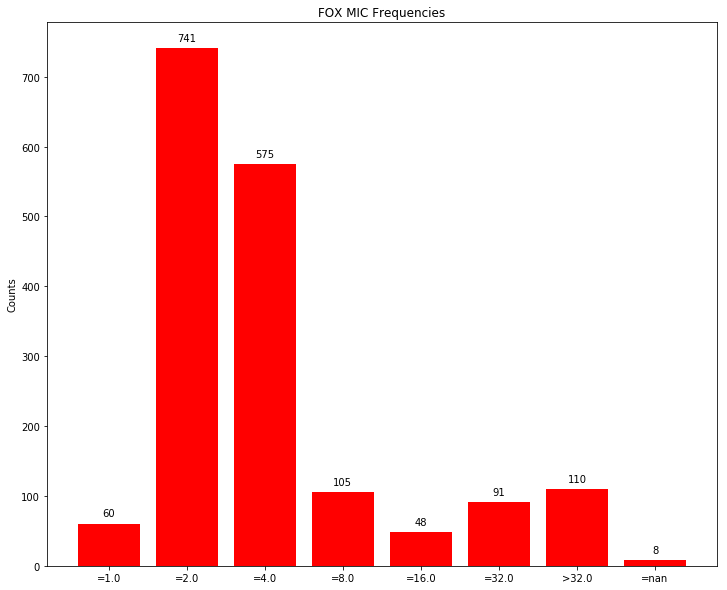

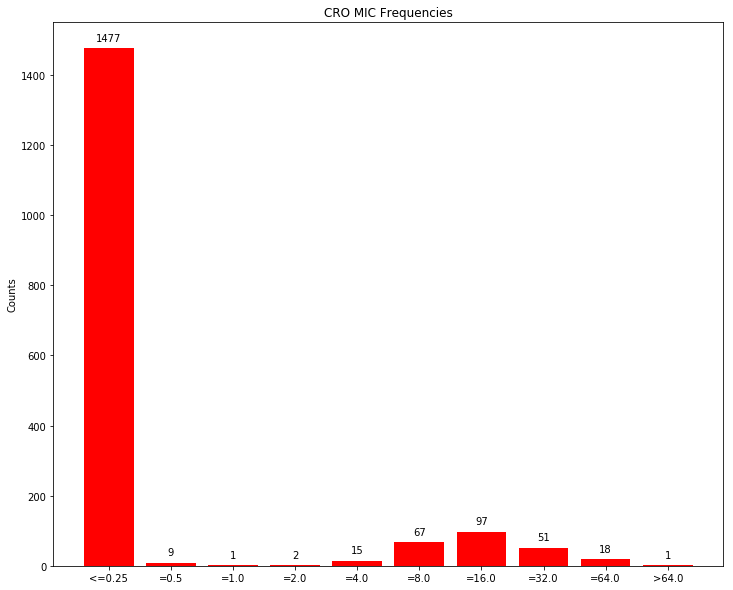

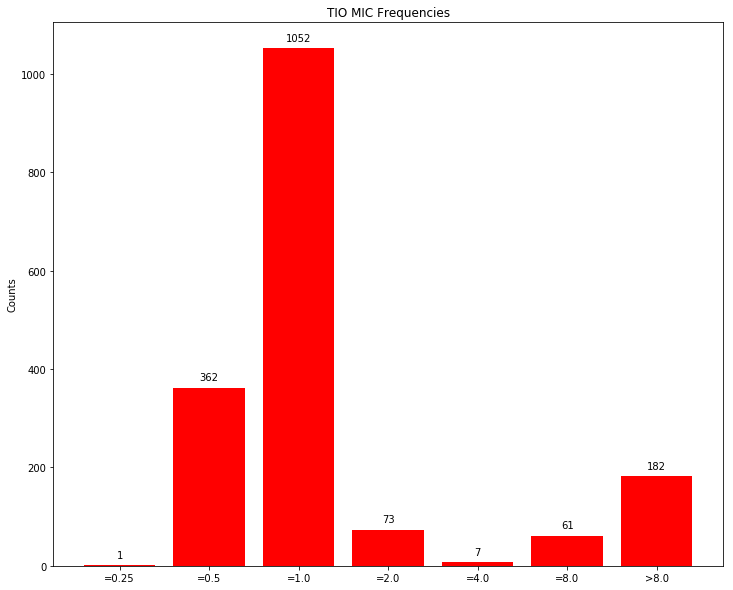

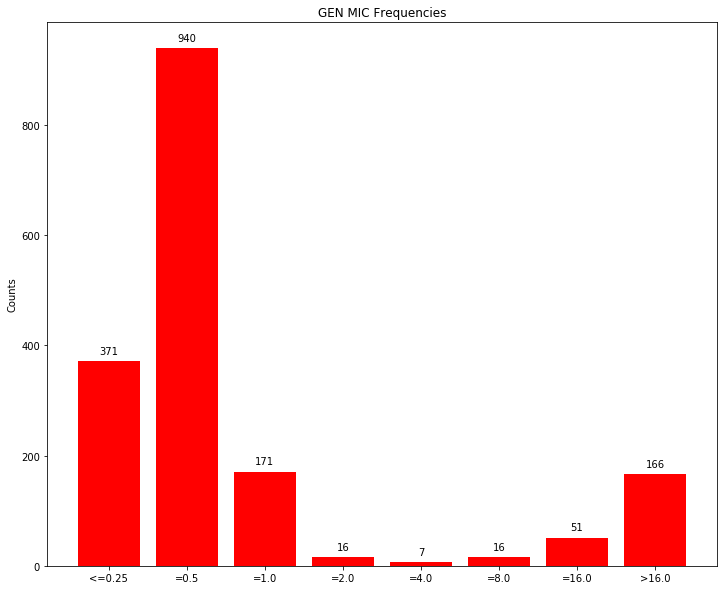

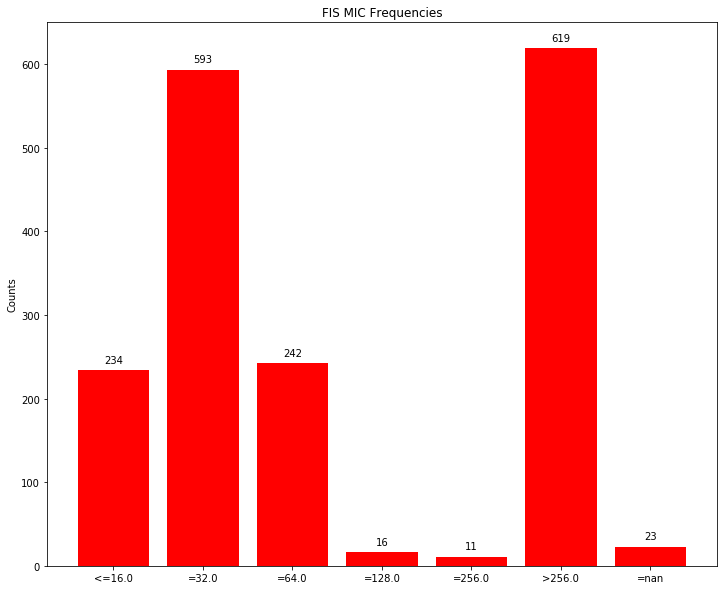

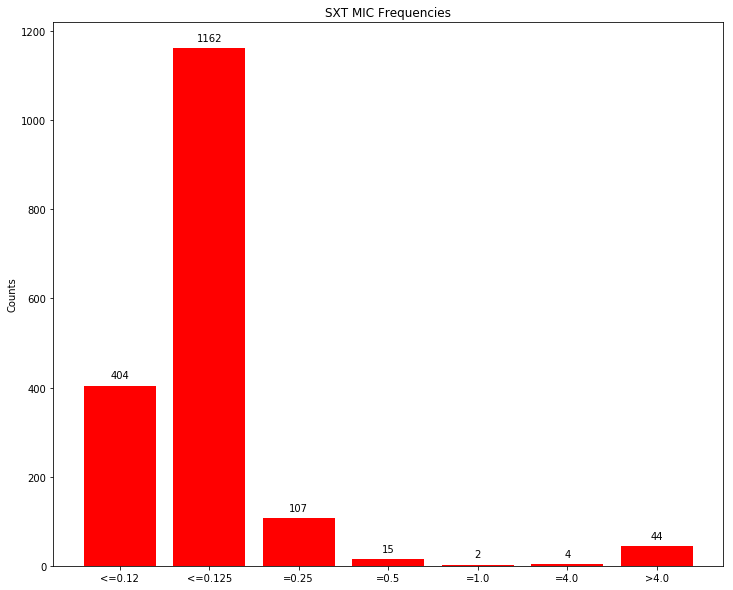

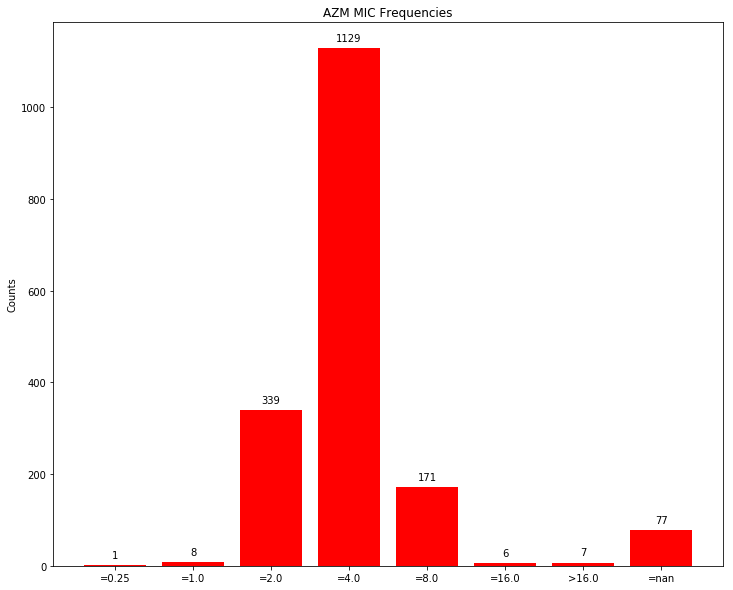

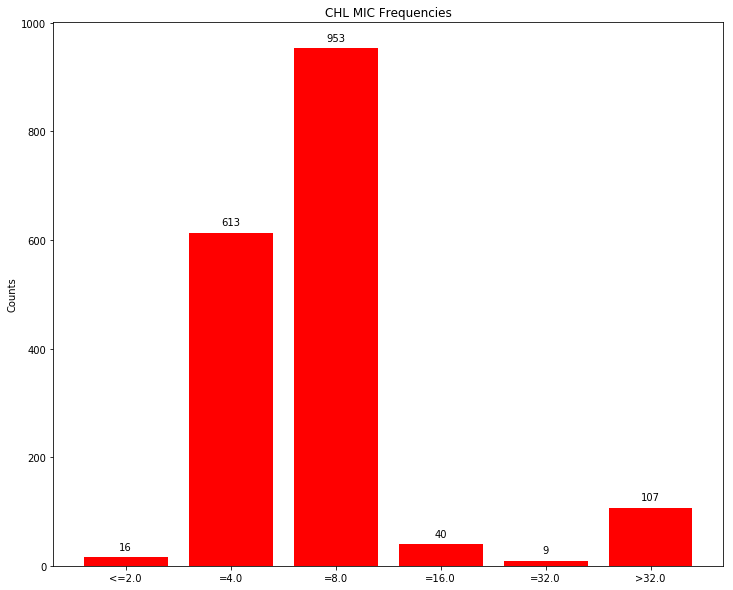

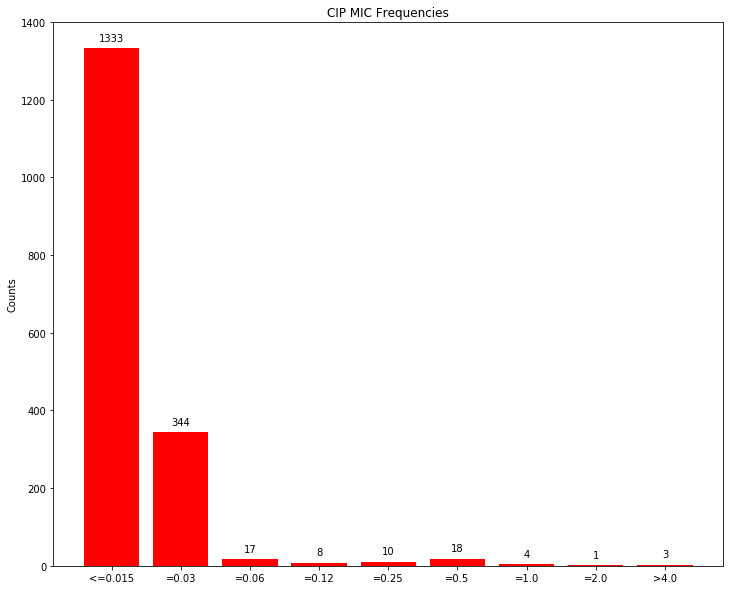

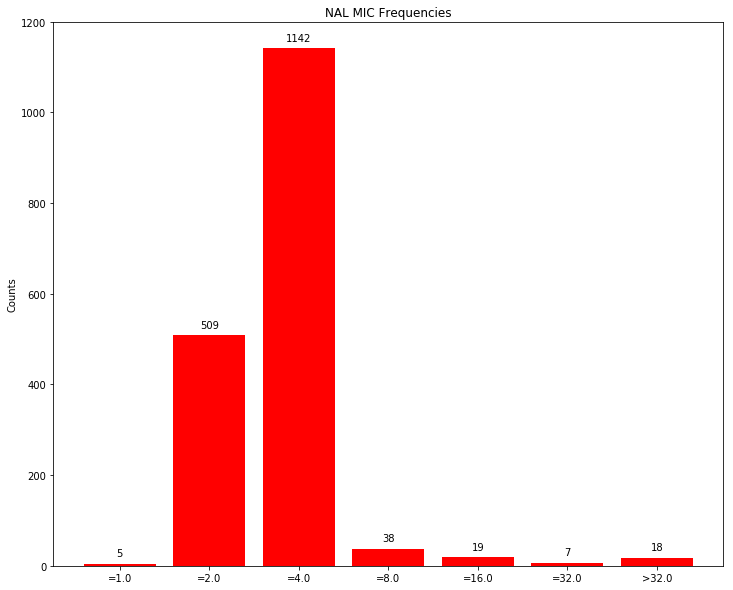

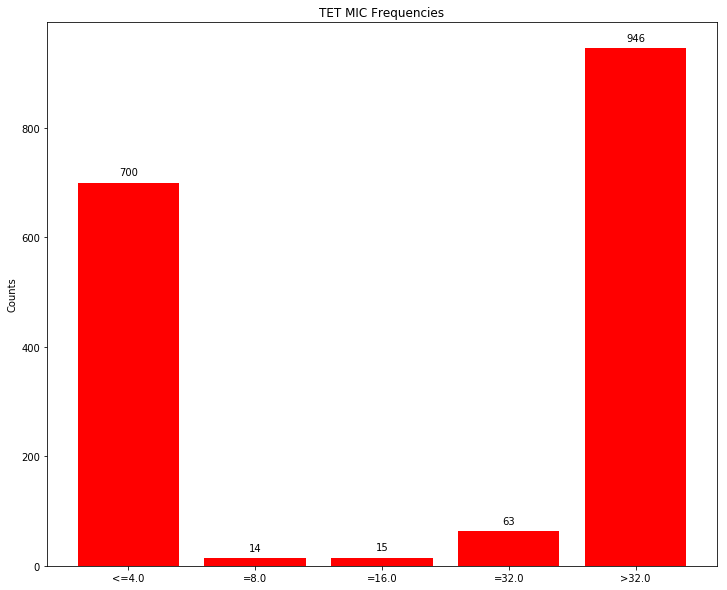

In [141]:
# MIC binning
for drug in list(mic):
    micval = micsign[drug] + mic[drug].map(str)
    vals, counts = np.unique(micval, return_counts=True)
    vals = vals.astype(str)
    modvals = np.char.strip(vals, '>')
    modvals = np.char.strip(modvals,'>=')
    modvals = np.char.strip(modvals, '<')
    modvals = np.char.strip(modvals, '<=')
    modvals = np.char.strip(modvals, '=')
    sortedord = np.argsort(modvals.astype(float))
    vals = vals[sortedord]
    counts = counts[sortedord]
    
    N = len(vals)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.8       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color='r')

    ax.set_ylabel('Counts')
    ax.set_title(drug + ' MIC Frequencies')
    ax.set_xticks(ind)
    ax.set_xticklabels(vals)

    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        _, ymax = plt.ylim()
        bump = ymax * 0.01
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

    plt.show()

In [142]:
# Save binning for
serotypes, counts = np.unique(meta['SEROTYPE'], return_counts=True)

In [147]:
pd.DataFrame([serotypes, counts]).transpose().to_csv('fda_study.csv',sep="\t", index=False, header=False)

In [6]:
print(micsdf)

                  AMC        AMP       AZM       CHL       CIP        CRO  \
run                                                                         
SRR2566900   <=1.0000   <=1.0000    2.0000  <=2.0000  <=0.0150   <=0.2500   
SRR3665157   <=1.0000   <=1.0000    4.0000  <=2.0000  <=0.0150   <=0.2500   
SRR2407707   <=1.0000   <=1.0000    4.0000    4.0000    0.0300   <=0.2500   
SRR2407694   <=1.0000     2.0000    4.0000    4.0000    0.0300   <=0.2500   
SRR2407599   <=1.0000   <=1.0000    4.0000    4.0000    0.0300   <=0.2500   
SRR2407704   <=1.0000     2.0000    4.0000    4.0000    0.0300   <=0.2500   
SRR3664606   <=1.0000   <=1.0000    4.0000    4.0000    0.0300   <=0.2500   
SRR2407697   <=1.0000   <=1.0000    8.0000    4.0000    0.0300   <=0.2500   
SRR2407691     2.0000     2.0000    8.0000    4.0000    0.0300   <=0.2500   
SRR2407706   <=1.0000   <=1.0000    4.0000    8.0000    0.0300   <=0.2500   
SRR2407712   <=1.0000   <=1.0000    4.0000    8.0000    0.0300   <=0.2500   

In [11]:
class_orders

{'AMC': ['<=1.0000', '2.0000', '4.0000', '8.0000', '16.0000', '>=32.0000'],
 'AMP': ['<=1.0000', '2.0000', '4.0000', '8.0000', '16.0000', '>=32.0000'],
 'AZM': ['<=1.0000', '2.0000', '4.0000', '8.0000', '16.0000', '>16.0000'],
 'CHL': ['<=2.0000', '4.0000', '8.0000', '16.0000', '32.0000', '>32.0000'],
 'CIP': ['<=0.0150',
  '0.0300',
  '0.0600',
  '0.1200',
  '0.2500',
  '0.5000',
  '1.0000',
  '2.0000',
  '>=4.0000'],
 'CRO': ['<=0.2500',
  '0.5000',
  '1.0000',
  '2.0000',
  '4.0000',
  '8.0000',
  '16.0000',
  '32.0000',
  '>=64.0000'],
 'FIS': ['<=16.0000',
  '32.0000',
  '64.0000',
  '128.0000',
  '256.0000',
  '>256.0000'],
 'FOX': ['<=1.0000', '2.0000', '4.0000', '8.0000', '16.0000', '>=32.0000'],
 'GEN': ['<=0.2500',
  '0.5000',
  '1.0000',
  '2.0000',
  '4.0000',
  '8.0000',
  '>=16.0000'],
 'NAL': ['1.0000',
  '2.0000',
  '4.0000',
  '8.0000',
  '16.0000',
  '32.0000',
  '>32.0000'],
 'SXT': ['<=0.1250',
  '0.2500',
  '0.5000',
  '1.0000',
  '4.0000',
  '8.0000',
  '16.0000',

In [33]:
micsdf.

,AMC,AMP,AZM,CHL,CIP,CRO,FIS,FOX,GEN,NAL,SXT,TET,TIO
run,,,,,,,,,,,,,
SRR2566900,<=1.0000,<=1.0000,2.0000,<=2.0000,<=0.0150,<=0.2500,<=16.0000,4.0000,0.5000,1.0000,<=0.1250,<=4.0000,1.0000
SRR3665157,<=1.0000,<=1.0000,4.0000,<=2.0000,<=0.0150,<=0.2500,<=16.0000,<=1.0000,<=0.2500,1.0000,<=0.1250,<=4.0000,0.5000
SRR2407707,<=1.0000,<=1.0000,4.0000,4.0000,0.0300,<=0.2500,32.0000,4.0000,0.5000,2.0000,<=0.1250,<=4.0000,1.0000
SRR2407694,<=1.0000,2.0000,4.0000,4.0000,0.0300,<=0.2500,32.0000,2.0000,1.0000,2.0000,<=0.1250,<=4.0000,1.0000
SRR2407599,<=1.0000,<=1.0000,4.0000,4.0000,0.0300,<=0.2500,64.0000,2.0000,0.5000,2.0000,<=0.1250,<=4.0000,1.0000
SRR2407704,<=1.0000,2.0000,4.0000,4.0000,0.0300,<=0.2500,64.0000,8.0000,0.5000,2.0000,<=0.1250,<=4.0000,2.0000
SRR3664606,<=1.0000,<=1.0000,4.0000,4.0000,0.0300,<=0.2500,<=16.0000,4.0000,0.5000,2.0000,<=0.1250,<=4.0000,1.0000
SRR2407697,<=1.0000,<=1.0000,8.0000,4.0000,0.0300,<=0.2500,32.0000,4.0000,1.0000,2.0000,<=0.1250,<=4.0000,1.0000
SRR2407691,2.0000,2.0000,8.0000,4.0000,0.0300,<=0.2500,<=16.0000,4.0000,0.5000,2.0000,<=0.1250,<=4.0000,1.0000
